<a href="https://colab.research.google.com/github/zunderlab/eschr/blob/main/docs/notebooks/paul15_mouse_hematopoiesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESCHR analysis of mouse hematopoiesis

Finding population strucutures in scRNAseq of myeloid and erythroid differentiation from [Paul et al. (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

## Setup environment

In [ ]:
!pip install git+https://github.com/zunderlab/eschr.git@change_api

  Cloning https://github.com/zunderlab/eschr.git (to revision change_api) to /tmp/pip-req-build-vgbe9mbo
  Running command git clone --filter=blob:none --quiet https://github.com/zunderlab/eschr.git /tmp/pip-req-build-vgbe9mbo
  Running command git checkout -b change_api --track origin/change_api
  Switched to a new branch 'change_api'
  Branch 'change_api' set up to track remote branch 'change_api' from 'origin'.
  Resolved https://github.com/zunderlab/eschr.git to commit 6cbb9671b410327f6ccf1760dcde4d670d0465cc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (set

In [ ]:
import eschr as es

/usr/local/lib/python3.10/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc

In [ ]:
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
results_file = './write/paul15.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

## Read in and preprocess data

In [ ]:
adata = sc.datasets.paul15()
adata

  0%|          | 0.00/9.82M [00:00<?, ?B/s]

... storing 'paul15_clusters' as categorical
Trying to set attribute `._uns` of view, copying.


AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

Apply a simple [preprocessing recipe](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html).

In [ ]:
sc.pp.recipe_zheng17(adata)

In [ ]:
adata

AnnData object with n_obs × n_vars = 2730 × 999
    obs: 'paul15_clusters', 'n_counts_all'
    var: 'n_counts', 'mean', 'std'
    uns: 'iroot', 'log1p'

## Run ESCHR analysis

In [ ]:
# Specify the path for creating the zarr store that
# will be used for interacting with your data.
zarr_loc = "./data/paul15.zarr"

In [ ]:
# Now you can run the method with your prepped data!
# (add any optional hyperparameter specifications,
# but bear in mind the method was designed to work for
# diverse datasets with the default settings.)

# Note that Colab will run single-core so runtime will be
# substantially longer than when run with multiple cores,
# as the multi-process parallelization in the ensemble stage
# cannot occur in a single core scenario

adata = es.tl.consensus_cluster(
            adata=adata,
            zarr_loc=zarr_loc
        )


Multiprocessing will use 2 cores
making zarr
storing zarr data object as ./data/paul15.zarr
starting ensemble clustering multiprocess
Ensemble clustering finished in 301.419547791 seconds
starting consensus multiprocess
Final res: 0.35
Consensus clustering finished in 79.92671029600001 seconds
Final Clustering:
n hard clusters: 9
n soft clusters: 36
Full runtime: 381.61227440834045


## ESCHR visualizations

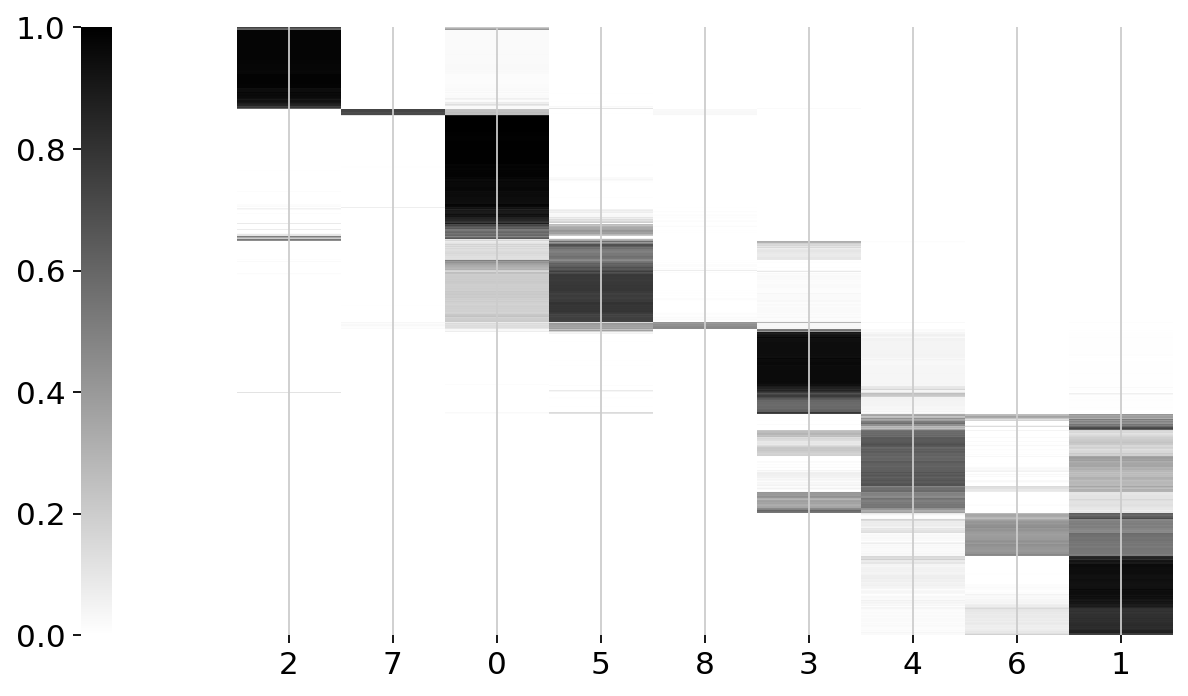

In [ ]:
# Plot soft membership matrix heatmap visualization
es.pl.smm_heatmap(adata)

'X_umap'
No umap found - running umap...


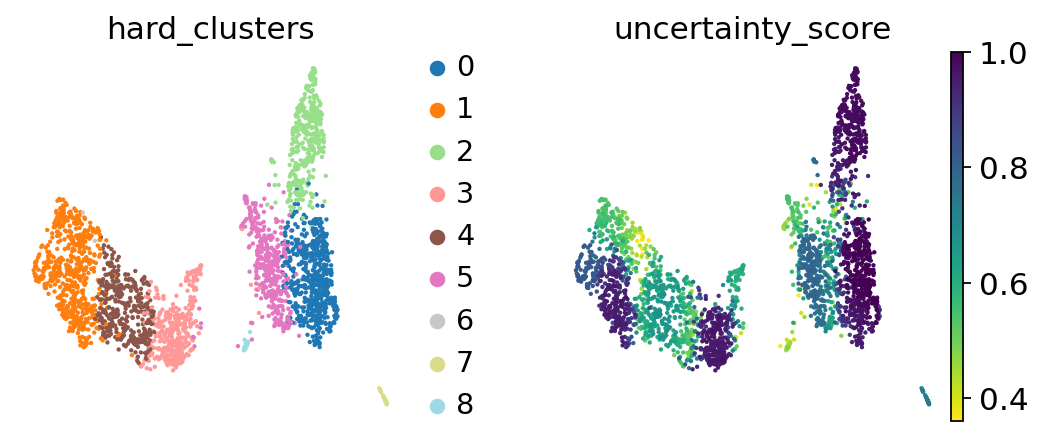

In [ ]:
# Plot UMAP layout with points colored by
# ESCHR hard cluster labels and by uncertainty scores
es.pl.umap_heatmap(adata)

## Scanpy visualizations

In [ ]:
# You can also use Scanpy to prepare a umap layout
# (or swap in your favorite 2D layout)
# to visualize the clustering results
sc.tl.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.umap(adata)

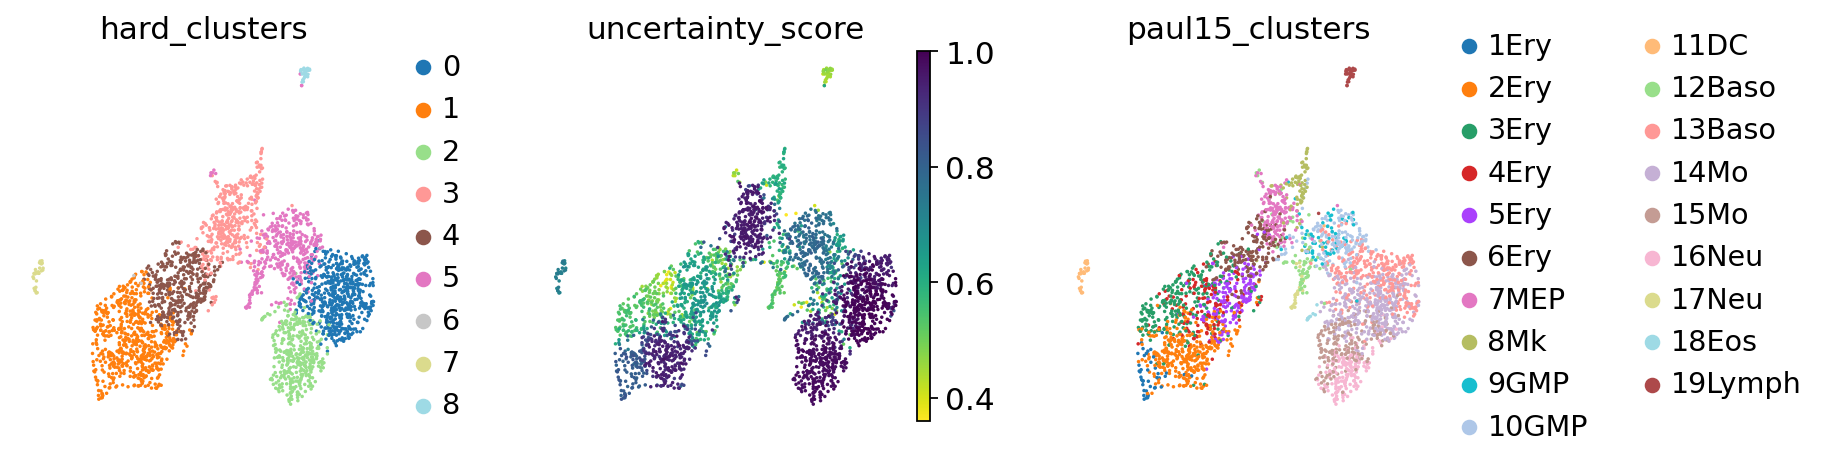

In [ ]:
sc.pl.umap(adata, color=['hard_clusters', 'uncertainty_score', 'paul15_clusters'],show=True, color_map='viridis_r', s=10)

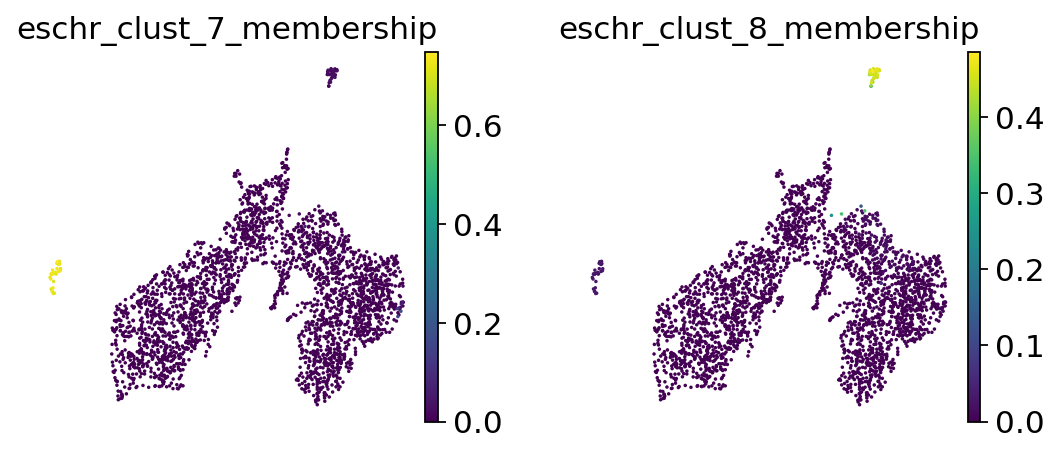

In [ ]:
adata.obs['eschr_clust_7_membership'] = adata.obsm['soft_membership_matrix'][:,7]
adata.obs['eschr_clust_8_membership'] = adata.obsm['soft_membership_matrix'][:,8]
sc.pl.umap(adata, color=['eschr_clust_7_membership', 'eschr_clust_8_membership'],show=True, s=10)

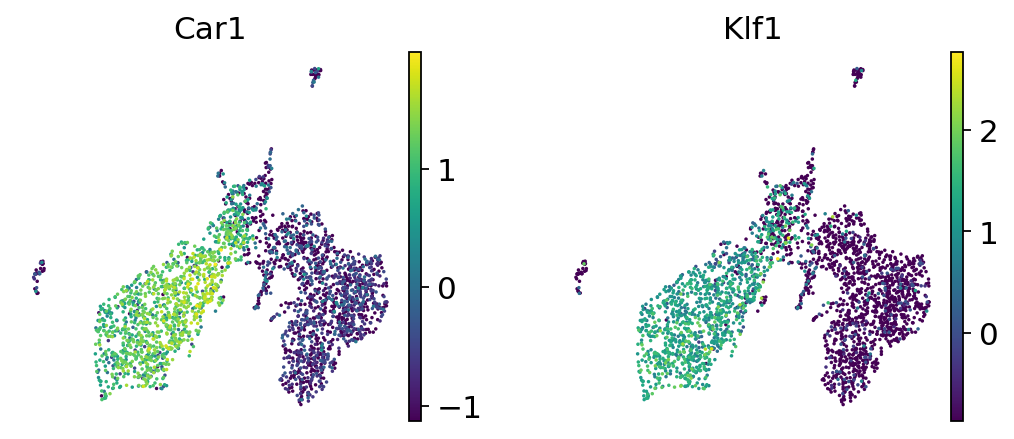

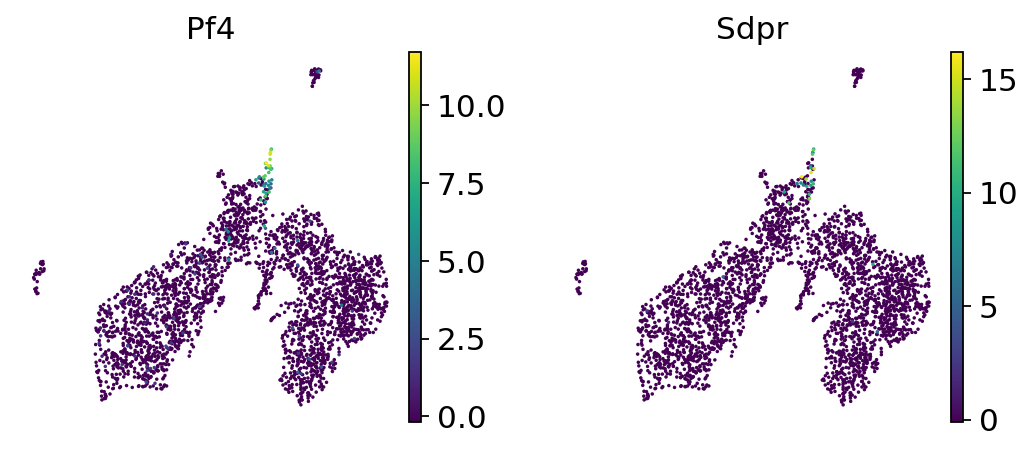

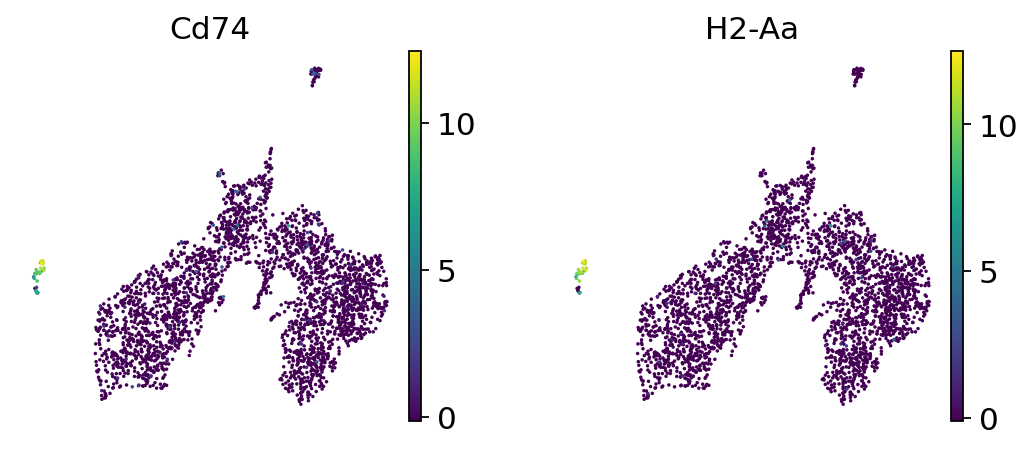

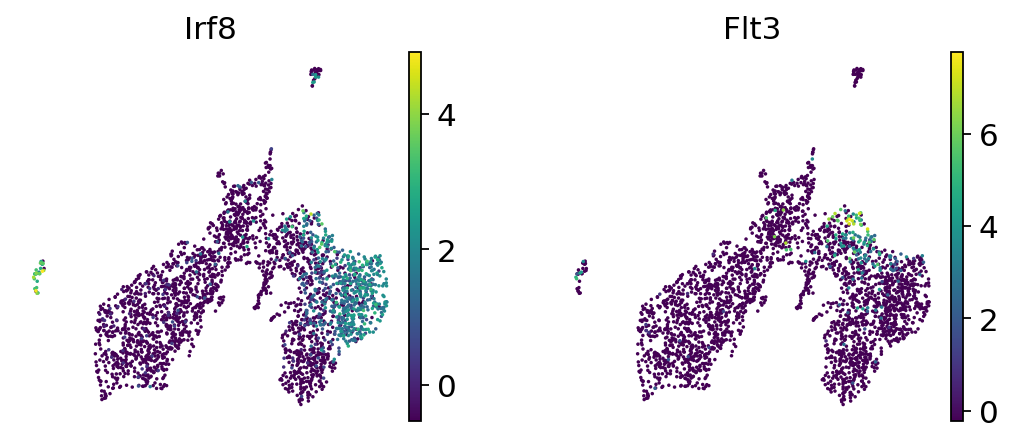

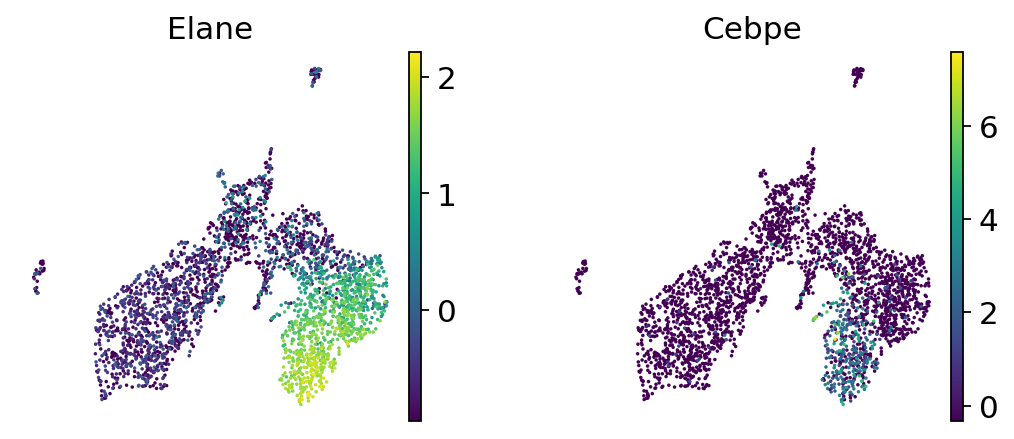

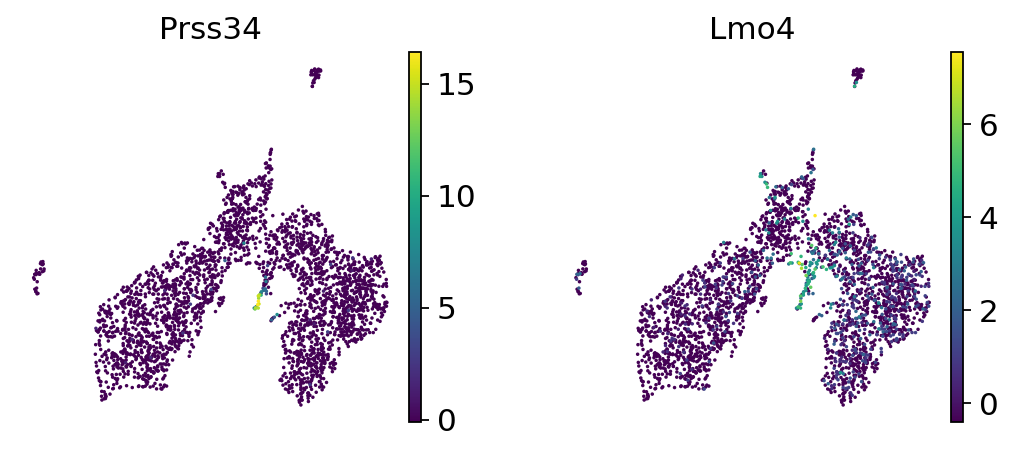

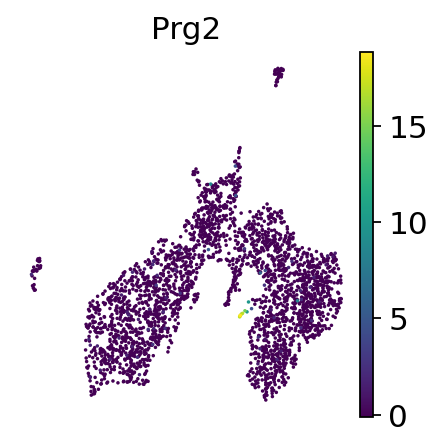

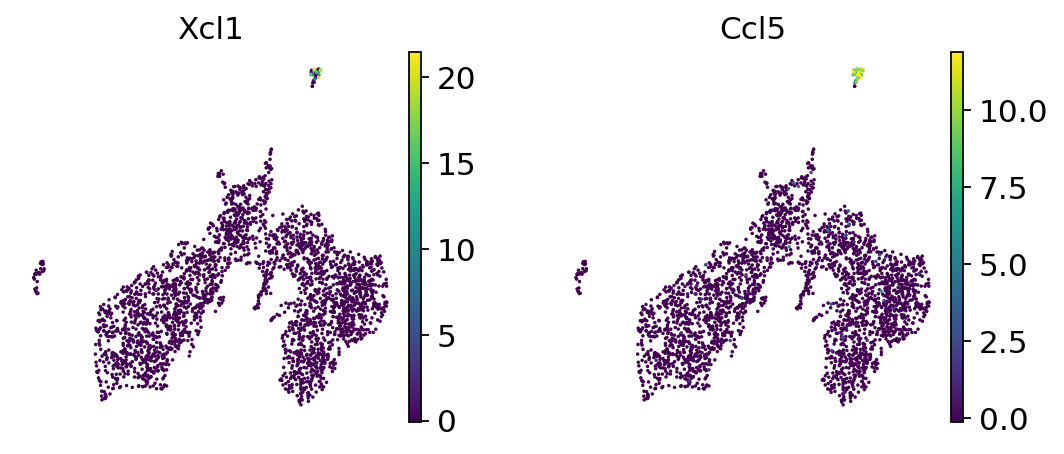

In [ ]:
cell_type_markers = {"Erythroid": ['Car1', 'Klf1'],
                     "Megakaryocytes": ['Pf4','Sdpr'],
                     "Dendritic cells": ['Cd74','H2-Aa'],
                    "Monocytes":['Irf8', 'Flt3'],
                    "Neutrophils":['Elane','Cebpe'],
                    "Basophils": ['Prss34','Lmo4'],
                    "Eosonophils": ['Prg2'],
                    "Natural killer cells":['Xcl1','Ccl5']}
for markers_ls in cell_type_markers.values():
  sc.pl.umap(adata, color=markers_ls,show=True,s=10)

## Downstream scverse analyses with ESCHR clusters

ESCHR clusters can be used for external downstream analyses such as PAGA

In [ ]:
sc.tl.paga(adata, groups='hard_clusters')

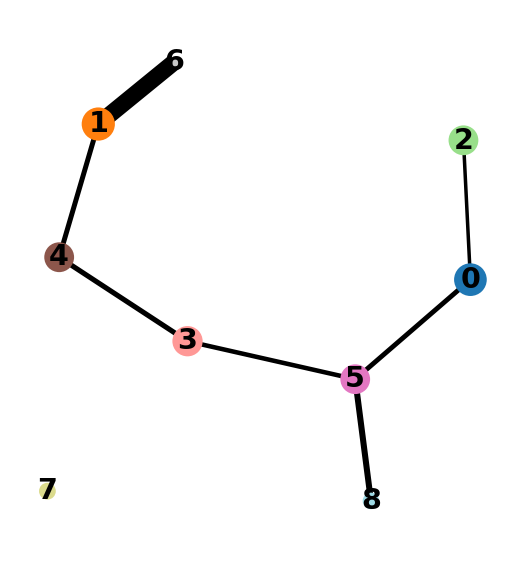

In [ ]:
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.paga(adata, color=['hard_clusters'], threshold=0.2)